# Check for Files

In [1]:
import os

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'KNN Revised.ipynb',
 'KNN.html',
 'KNN.ipynb',
 'meshgrid-contour.py',
 'Social_Network_Ads.csv']

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the Dataset

In [4]:
dataFrame = pd.read_csv("Social_Network_Ads.csv")

In [5]:
dataFrame.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Separate the Independent X and Dependent y Matrices

In [7]:
X = dataFrame[ ['Age', 'EstimatedSalary' ] ]

In [8]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [9]:
y = dataFrame['Purchased']

In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [11]:
X = np.array(X)

In [12]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [13]:
y = np.array(y)

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

## To prepare Training and Testing Datasets

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [17]:
X_train

array([[    42,  53000],
       [    36,  99000],
       [    48, 134000],
       [    23,  63000],
       [    52, 138000],
       [    27,  84000],
       [    45, 131000],
       [    46,  79000],
       [    37, 146000],
       [    37,  74000],
       [    28,  59000],
       [    59,  83000],
       [    35,  27000],
       [    37,  70000],
       [    44,  39000],
       [    26,  72000],
       [    48, 138000],
       [    52, 114000],
       [    31,  89000],
       [    27, 137000],
       [    35,  47000],
       [    49,  28000],
       [    33,  69000],
       [    32, 117000],
       [    42, 104000],
       [    19,  19000],
       [    51,  23000],
       [    40,  61000],
       [    26,  81000],
       [    48,  29000],
       [    34,  72000],
       [    19,  25000],
       [    24,  32000],
       [    35,  72000],
       [    36, 125000],
       [    29,  75000],
       [    26,  43000],
       [    28,  37000],
       [    58,  95000],
       [    22,  63000],


In [18]:
y_test

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

## Feature Scaling of Data

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scale_X = StandardScaler()

In [21]:
X_train = scale_X.fit_transform(X_train)

In [22]:
X_test = scale_X.transform(X_test)

In [23]:
X_test

array([[-0.72449788,  0.30175141],
       [ 0.11613137,  0.18483126],
       [ 0.67655088,  0.30175141],
       [-1.00470763, -0.34130939],
       [ 0.20953462,  0.27252137],
       [-0.07067513, -0.48745958],
       [ 0.86335738,  1.29557265],
       [ 1.05016388,  0.59405177],
       [-0.16407838, -0.16592917],
       [ 0.02272812,  1.29557265],
       [-0.72449788, -0.57514968],
       [-1.09811088,  0.33098145],
       [-0.25748163, -1.27667056],
       [-0.91130438, -1.0720603 ],
       [-0.72449788, -1.51051085],
       [-0.53769138,  1.50018291],
       [-0.35088488, -0.7505299 ],
       [-1.47172388, -1.21821049],
       [-1.09811088, -0.9843702 ],
       [ 1.79738988,  1.55864298],
       [-1.09811088, -1.13052038],
       [ 1.23697038,  2.26016385],
       [ 2.07759963,  0.97404225],
       [-0.16407838, -0.4289995 ],
       [-0.72449788,  0.59405177],
       [ 1.70398663,  1.88017338],
       [-0.91130438, -0.28284932],
       [-0.07067513,  0.09714115],
       [-0.25748163,

## Pass the Data K Nearest Neighbour Model

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
classifier = KNeighborsClassifier()

In [26]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [27]:
y_predict = classifier.predict(X_test)

In [28]:
y_predict

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [29]:
y_test

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

## Confusion Matrix to understand wrong prediction

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
cm = confusion_matrix(y_test, y_predict)

In [32]:
cm

array([[61,  2],
       [10, 27]], dtype=int64)

## Plot the Results here 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


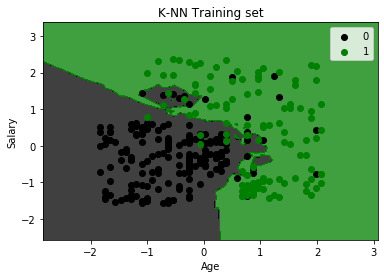

In [33]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_point, y_point = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_point[:, 0].min() - 1, stop = X_point[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_point[:, 1].min() - 1, stop = X_point[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('black', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_point)):
    plt.scatter(X_point[y_point == j, 0], X_point[y_point == j, 1],
                c = ListedColormap(('black', 'green'))(i), label = j)
plt.title('K-NN Training set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


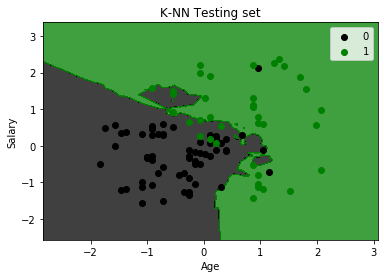

In [34]:
# Visualising the Testing set results
from matplotlib.colors import ListedColormap
X_point, y_point = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_point[:, 0].min() - 1, stop = X_point[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_point[:, 1].min() - 1, stop = X_point[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('black', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_point)):
    plt.scatter(X_point[y_point == j, 0], X_point[y_point == j, 1],
                c = ListedColormap(('black', 'green'))(i), label = j)
plt.title('K-NN Testing set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()